<a href="https://colab.research.google.com/github/Amogh-S-Acharya/ai-ml_basic_requirement/blob/main/Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [7]:
df = pd.read_csv('diabetes.csv')

In [8]:
df.isnull().sum()
X = df.drop('Outcome', axis=1)
y = df['Outcome']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [11]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7467532467532467
[[78 21]
 [18 37]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict using your trained model
y_pred = model.predict(X_test)

# Standard Evaluation Metrics
print("Overall Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Extract values from confusion matrix
cm = confusion_matrix(y_test, y_pred)
TN = cm[0][0]  # True Negatives (class 0 correct)
FP = cm[0][1]  # False Positives (class 0 misclassified)
FN = cm[1][0]  # False Negatives (class 1 misclassified)
TP = cm[1][1]  # True Positives (class 1 correct)

# Accuracy for class 0 (Non-Diabetic)
non_diabetic_accuracy = TN / (TN + FP)
print("Accuracy for predicting NON-DIABETIC (class 0):", round(non_diabetic_accuracy, 2))

# Accuracy for class 1 (Diabetic)
diabetic_accuracy = TP / (TP + FN)
print("Accuracy for predicting DIABETIC (class 1):", round(diabetic_accuracy, 2))


Overall Accuracy: 0.7467532467532467

Confusion Matrix:
 [[78 21]
 [18 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Accuracy for predicting NON-DIABETIC (class 0): 0.79
Accuracy for predicting DIABETIC (class 1): 0.67


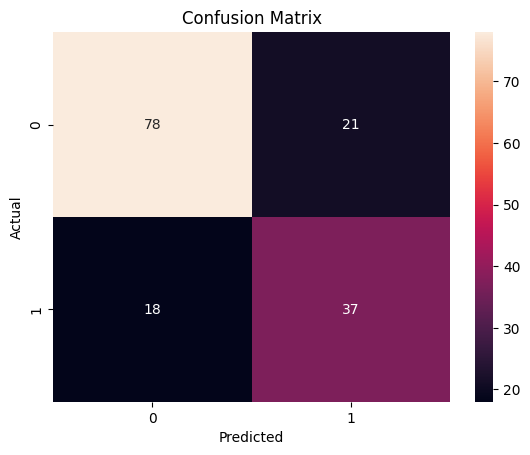

In [13]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# True Positive (TP): Model correctly predicted 1.

# True Negative (TN): Model correctly predicted 0.

# False Positive (FP): Model wrongly predicted 1 instead of 0.

# False Negative (FN): Model wrongly predicted 0 instead of 1.


In [ ]:
y_pred = model.predict(X_test)
print("Predictions:", y_pred)


Predictions: [0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


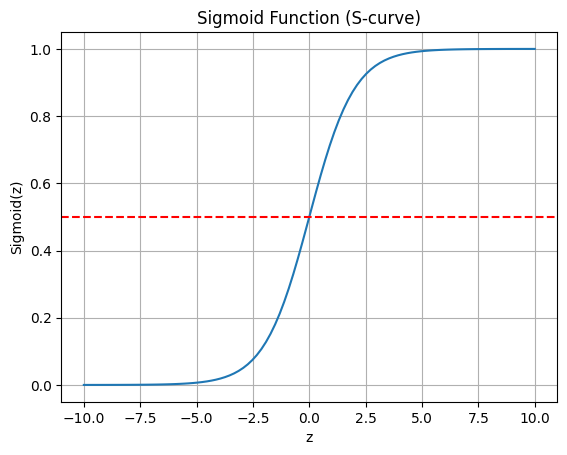

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


z = np.linspace(-10, 10, 100)
sig = sigmoid(z)


plt.plot(z, sig)
plt.title('Sigmoid Function (S-curve)')
plt.xlabel('z')
plt.ylabel('Sigmoid(z)')
plt.grid(True)
plt.axhline(y=0.5, color='red', linestyle='--')
plt.show()


# If probability > 0.5 → Model predicts 1

# If probability < 0.5 → Model predicts 0



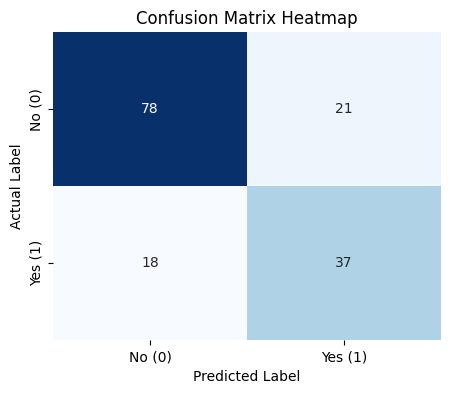

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# After predicting
y_pred = model.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.xticks([0.5, 1.5], ['No (0)', 'Yes (1)'])
plt.yticks([0.5, 1.5], ['No (0)', 'Yes (1)'])
plt.show()


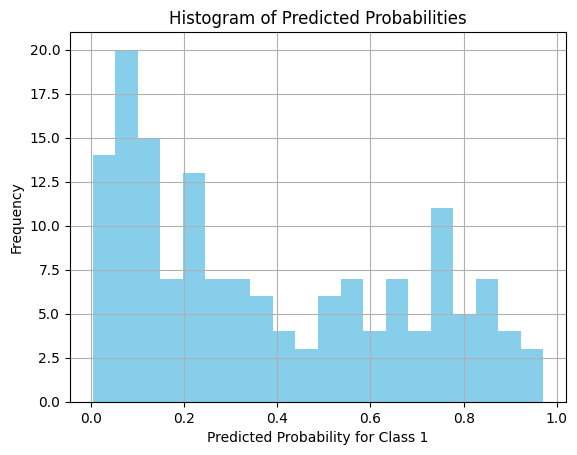

In [ ]:
y_prob = model.predict_proba(X_test)[:, 1]
plt.hist(y_prob, bins=20, color='skyblue')
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability for Class 1')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


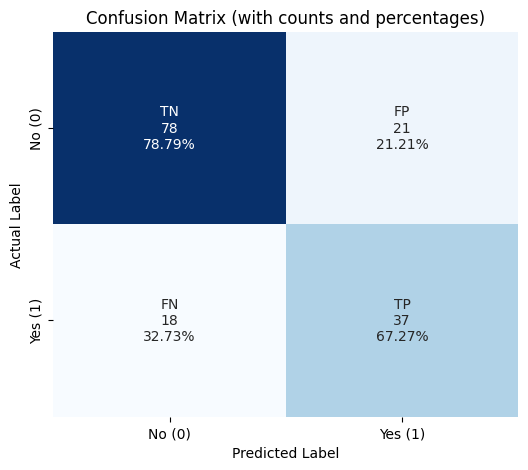

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict and get confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Calculate percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Label strings with counts and percentages
labels = np.array([["TN\n{0}\n{1:.2%}".format(cm[0,0], cm_percent[0,0]),
                    "FP\n{0}\n{1:.2%}".format(cm[0,1], cm_percent[0,1])],
                   ["FN\n{0}\n{1:.2%}".format(cm[1,0], cm_percent[1,0]),
                    "TP\n{0}\n{1:.2%}".format(cm[1,1], cm_percent[1,1])]])

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (with counts and percentages)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.xticks([0.5, 1.5], ['No (0)', 'Yes (1)'])
plt.yticks([0.5, 1.5], ['No (0)', 'Yes (1)'])
plt.show()
